## Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data From Files 

In [2]:
dom_data = pd.read_csv('DOM(sarangpani).csv', parse_dates=['date'])
NDSINDTINDSIpHDO_data = pd.read_csv('NDSI,NDTI,NDSI,pH,DO (Sarangpani).csv', parse_dates=['date'])
sm_data = pd.read_csv('SM(sarangpani).csv', parse_dates=['date'])
temp_data = pd.read_csv('Temperature(sarangpani).csv', parse_dates=['date'])
# sample_sub = pd.read_csv('./input/demand-forecasting-kernels-only/sample_submission.csv')
df = pd.concat([dom_data, NDSINDTINDSIpHDO_data, temp_data, sm_data], sort=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\2155613681.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dom_data = pd.read_csv('DOM(sarangpani).csv', parse_dates=['date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_14876\2155613681.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  temp_data = pd.read_csv('Temperature(sarangpani).csv', parse_dates=['date'])


In [3]:
df.head()

,date,Dissolved Oxygen Matter,Chlorophyll,Turbidity,Salinty,Dissolved Oxygen,pH,Temperature,Suspended Matter,Year,Month,Day
0,2018-02-01,0.559756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-01,0.550453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-01,0.475668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-01,0.522746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-01,0.468822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [4]:
df.dtypes.value_counts()

float64           11
datetime64[ns]     1
dtype: int64

## Checking the missing values

In [5]:
total = df.isnull().sum().sort_values(ascending=False) 
# Percent of missing values is estimated by dividing total missing and the original total
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# Concatenating the Total and Percent fields sing pandas concat fucntion
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Displays top 20 from our max sorted list
missing_data.head(20)

,Total,Percent
Temperature,2994,0.961773
Chlorophyll,2947,0.946675
Turbidity,2947,0.946675
Salinty,2947,0.946675
Dissolved Oxygen,2947,0.946675
pH,2947,0.946675
Dissolved Oxygen Matter,1905,0.611950
Suspended Matter,1494,0.479923
Year,1493,0.479602
Month,1493,0.479602


In [6]:
# As seen from above data we might consider to remove all columns with more than 50% value because they got little impact in 
# predicting the quality of clean water 

## Dealing with outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\631288234.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax[i//2,i%2])
C:\Users\HP\AppData\Local\Temp\ipykernel_14876\631288234.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax[i//2,i%2])
C:\Users\HP\AppData\Local\Te

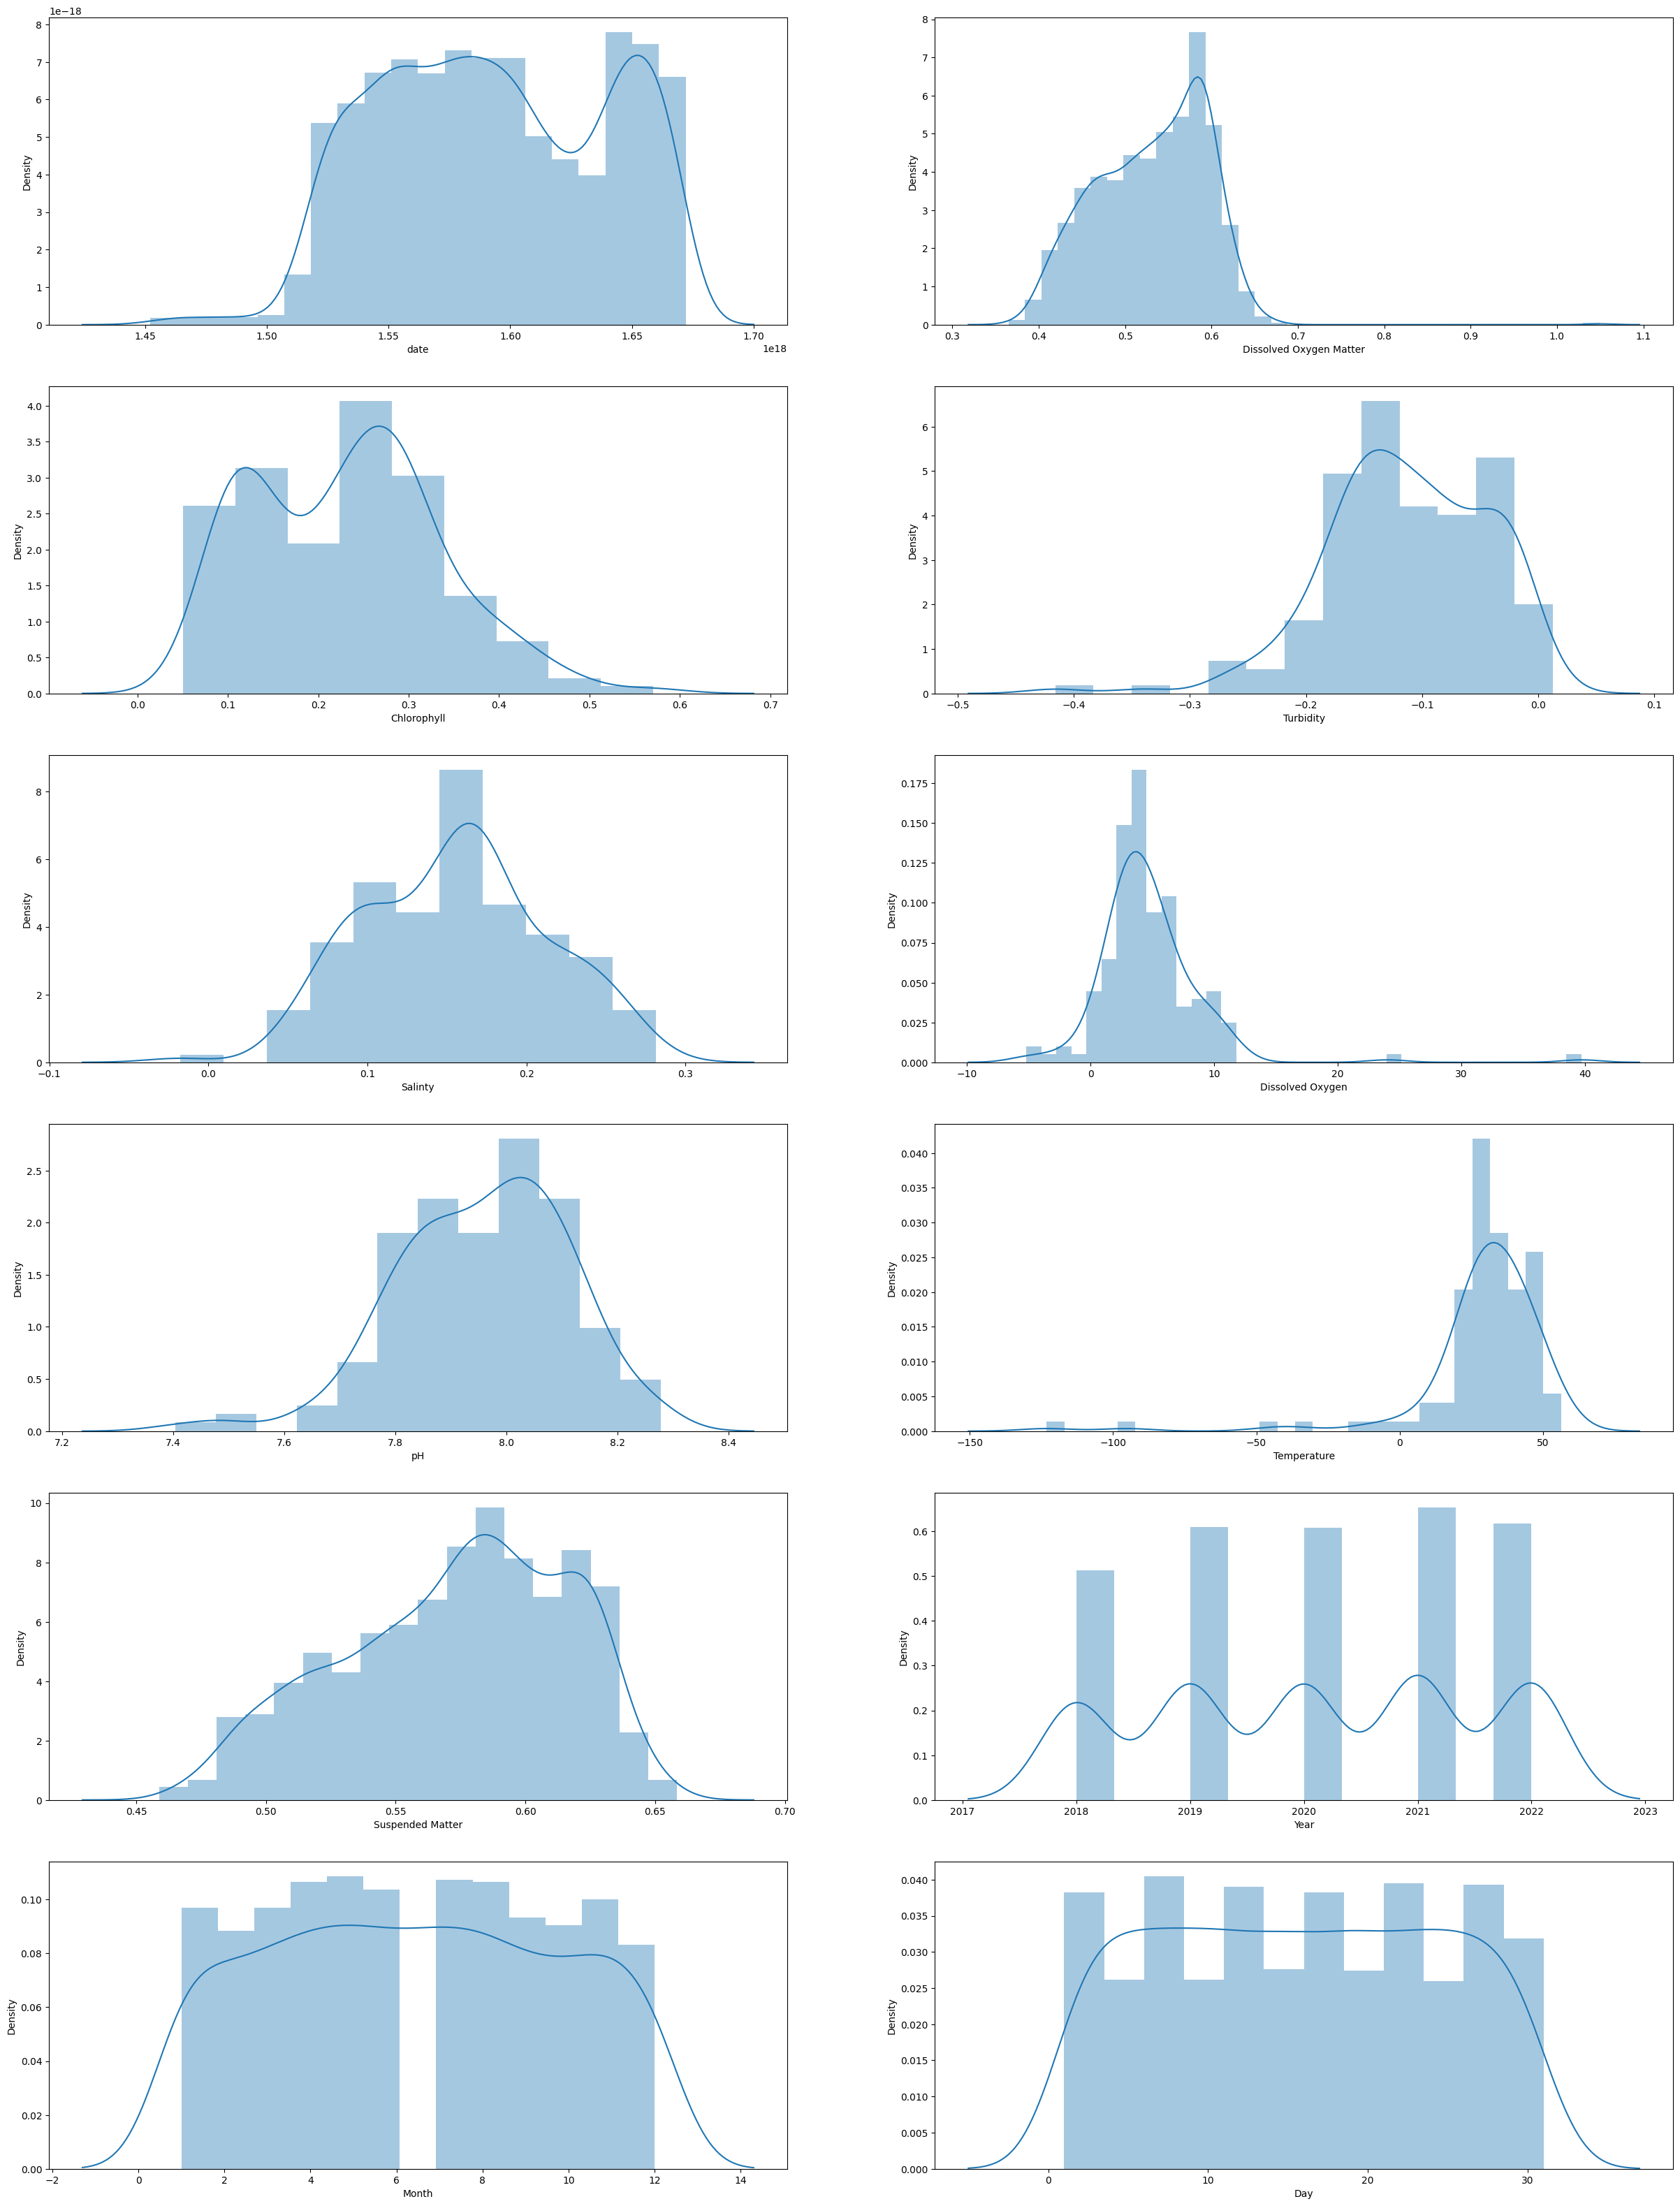

In [7]:
fig,ax = plt.subplots(6,2,figsize=(30,40))
i=0
for col in df.select_dtypes(exclude=['object']):
    #plt.figure() remove the line to avoid the text under the plot !
    #plt.rcParams["figure.figsize"] = (30,40)
    sns.distplot(df[col],ax=ax[i//2,i%2])
    i=i+1

In [8]:
# As from above graphs fetures like Dissolved Oxygen Matter (skewed to right), Turbidity(skewed to left),
# Dissolved Oxygen (skewed to right), and Temperature (skewed to left) have outliers which is be removed .

In [9]:
df.columns

Index(['date', 'Dissolved Oxygen Matter', 'Chlorophyll', 'Turbidity',
       'Salinty', 'Dissolved Oxygen', 'pH', 'Temperature', 'Suspended Matter',
       'Year', 'Month', 'Day'],
      dtype='object')

## Removing outliers from our variables `

In [10]:
# Creating a checkpoint for our data 
df2 = df.copy()

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\3838213081.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dom_without_outliers['Dissolved Oxygen Matter'])


<AxesSubplot: xlabel='Dissolved Oxygen Matter', ylabel='Density'>

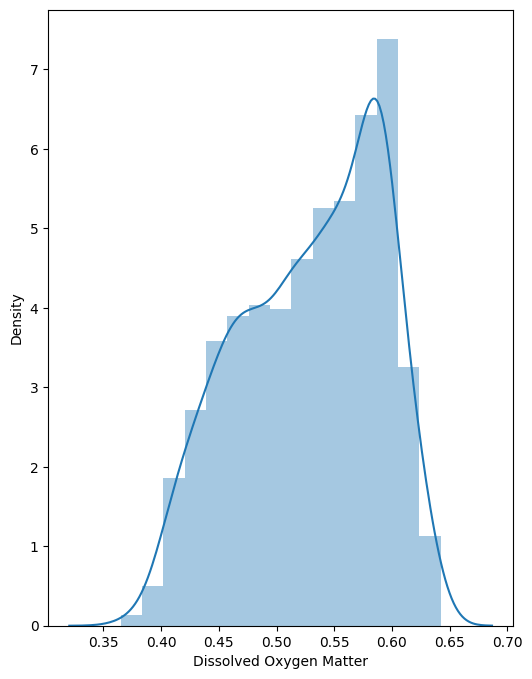

In [21]:
q = df2['Dissolved Oxygen Matter'].quantile(0.99)
dom_without_outliers = df2[df2['Dissolved Oxygen Matter'] < q]
fig = plt.subplots(figsize=(6,8))
sns.distplot(dom_without_outliers['Dissolved Oxygen Matter'])

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\1047108889.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(turbidity_without_outliers['Turbidity'])


<AxesSubplot: xlabel='Turbidity', ylabel='Density'>

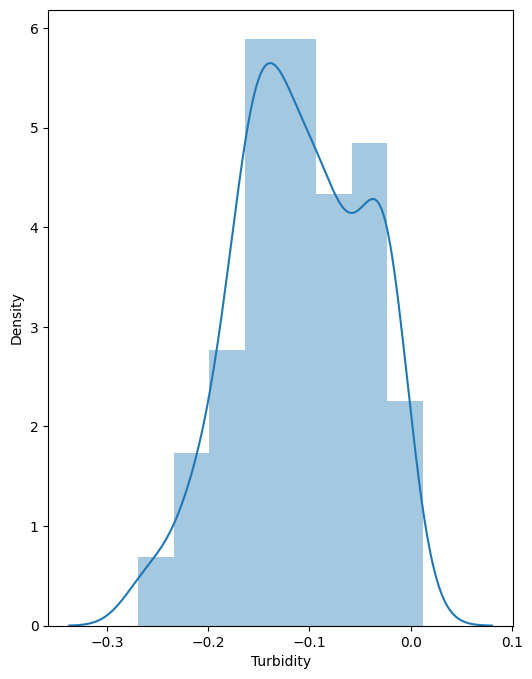

In [22]:
q = df2['Turbidity'].quantile(0.01)
turbidity_without_outliers = df2[df2['Turbidity'] > q] 
fig = plt.subplots(figsize=(6,8))
sns.distplot(turbidity_without_outliers['Turbidity'])

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\3276644195.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DO_without_outliers['Dissolved Oxygen'])


<AxesSubplot: xlabel='Dissolved Oxygen', ylabel='Density'>

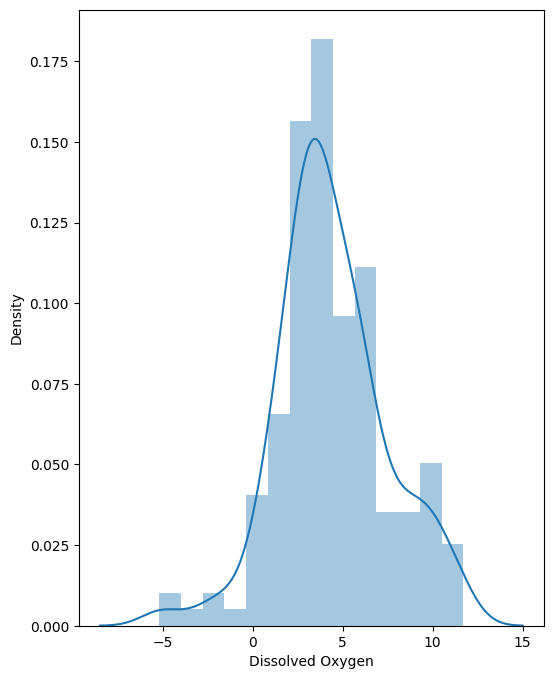

In [24]:
q = df2['Dissolved Oxygen'].quantile(0.99)
DO_without_outliers = df2[df2['Dissolved Oxygen'] < q] 
fig = plt.subplots(figsize=(6,8))
sns.distplot(DO_without_outliers['Dissolved Oxygen'])

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\1196907621.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_without_outliers['Temperature'])


<AxesSubplot: xlabel='Temperature', ylabel='Density'>

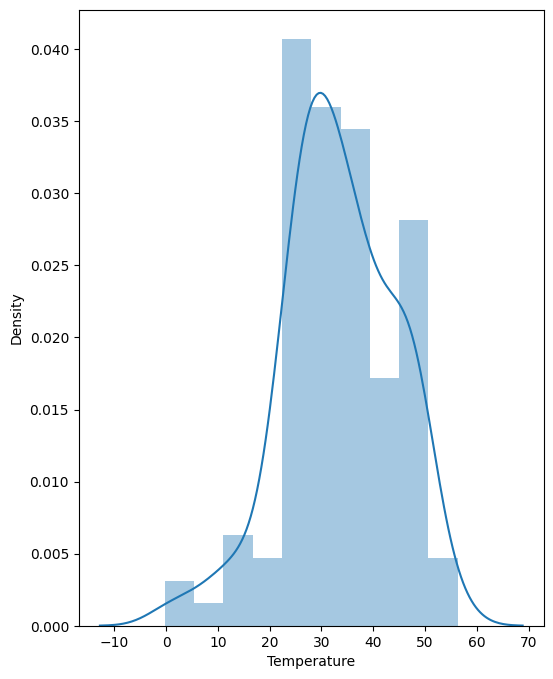

In [29]:
q = df2['Temperature'].quantile(0.05)
temp_without_outliers = df2[df2['Temperature'] > q] 
fig = plt.subplots(figsize=(6,8))
sns.distplot(temp_without_outliers['Temperature'])

## Organising all data with outliers remove in a single DataFrame

In [30]:
data_without_outliers = df2.copy()
data_without_outliers['Dissolved Oxygen Matter'] = dom_without_outliers['Dissolved Oxygen Matter']
data_without_outliers['Turbidity'] = turbidity_without_outliers['Turbidity']
data_without_outliers['Dissolved Oxygen'] = DO_without_outliers['Dissolved Oxygen']
data_without_outliers['Temperature'] = temp_without_outliers['Temperature']

## Plotting Data without otuliers

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\509975103.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_outliers[col],ax=ax[i//2,i%2])
C:\Users\HP\AppData\Local\Temp\ipykernel_14876\509975103.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_outliers[col],ax=ax[i

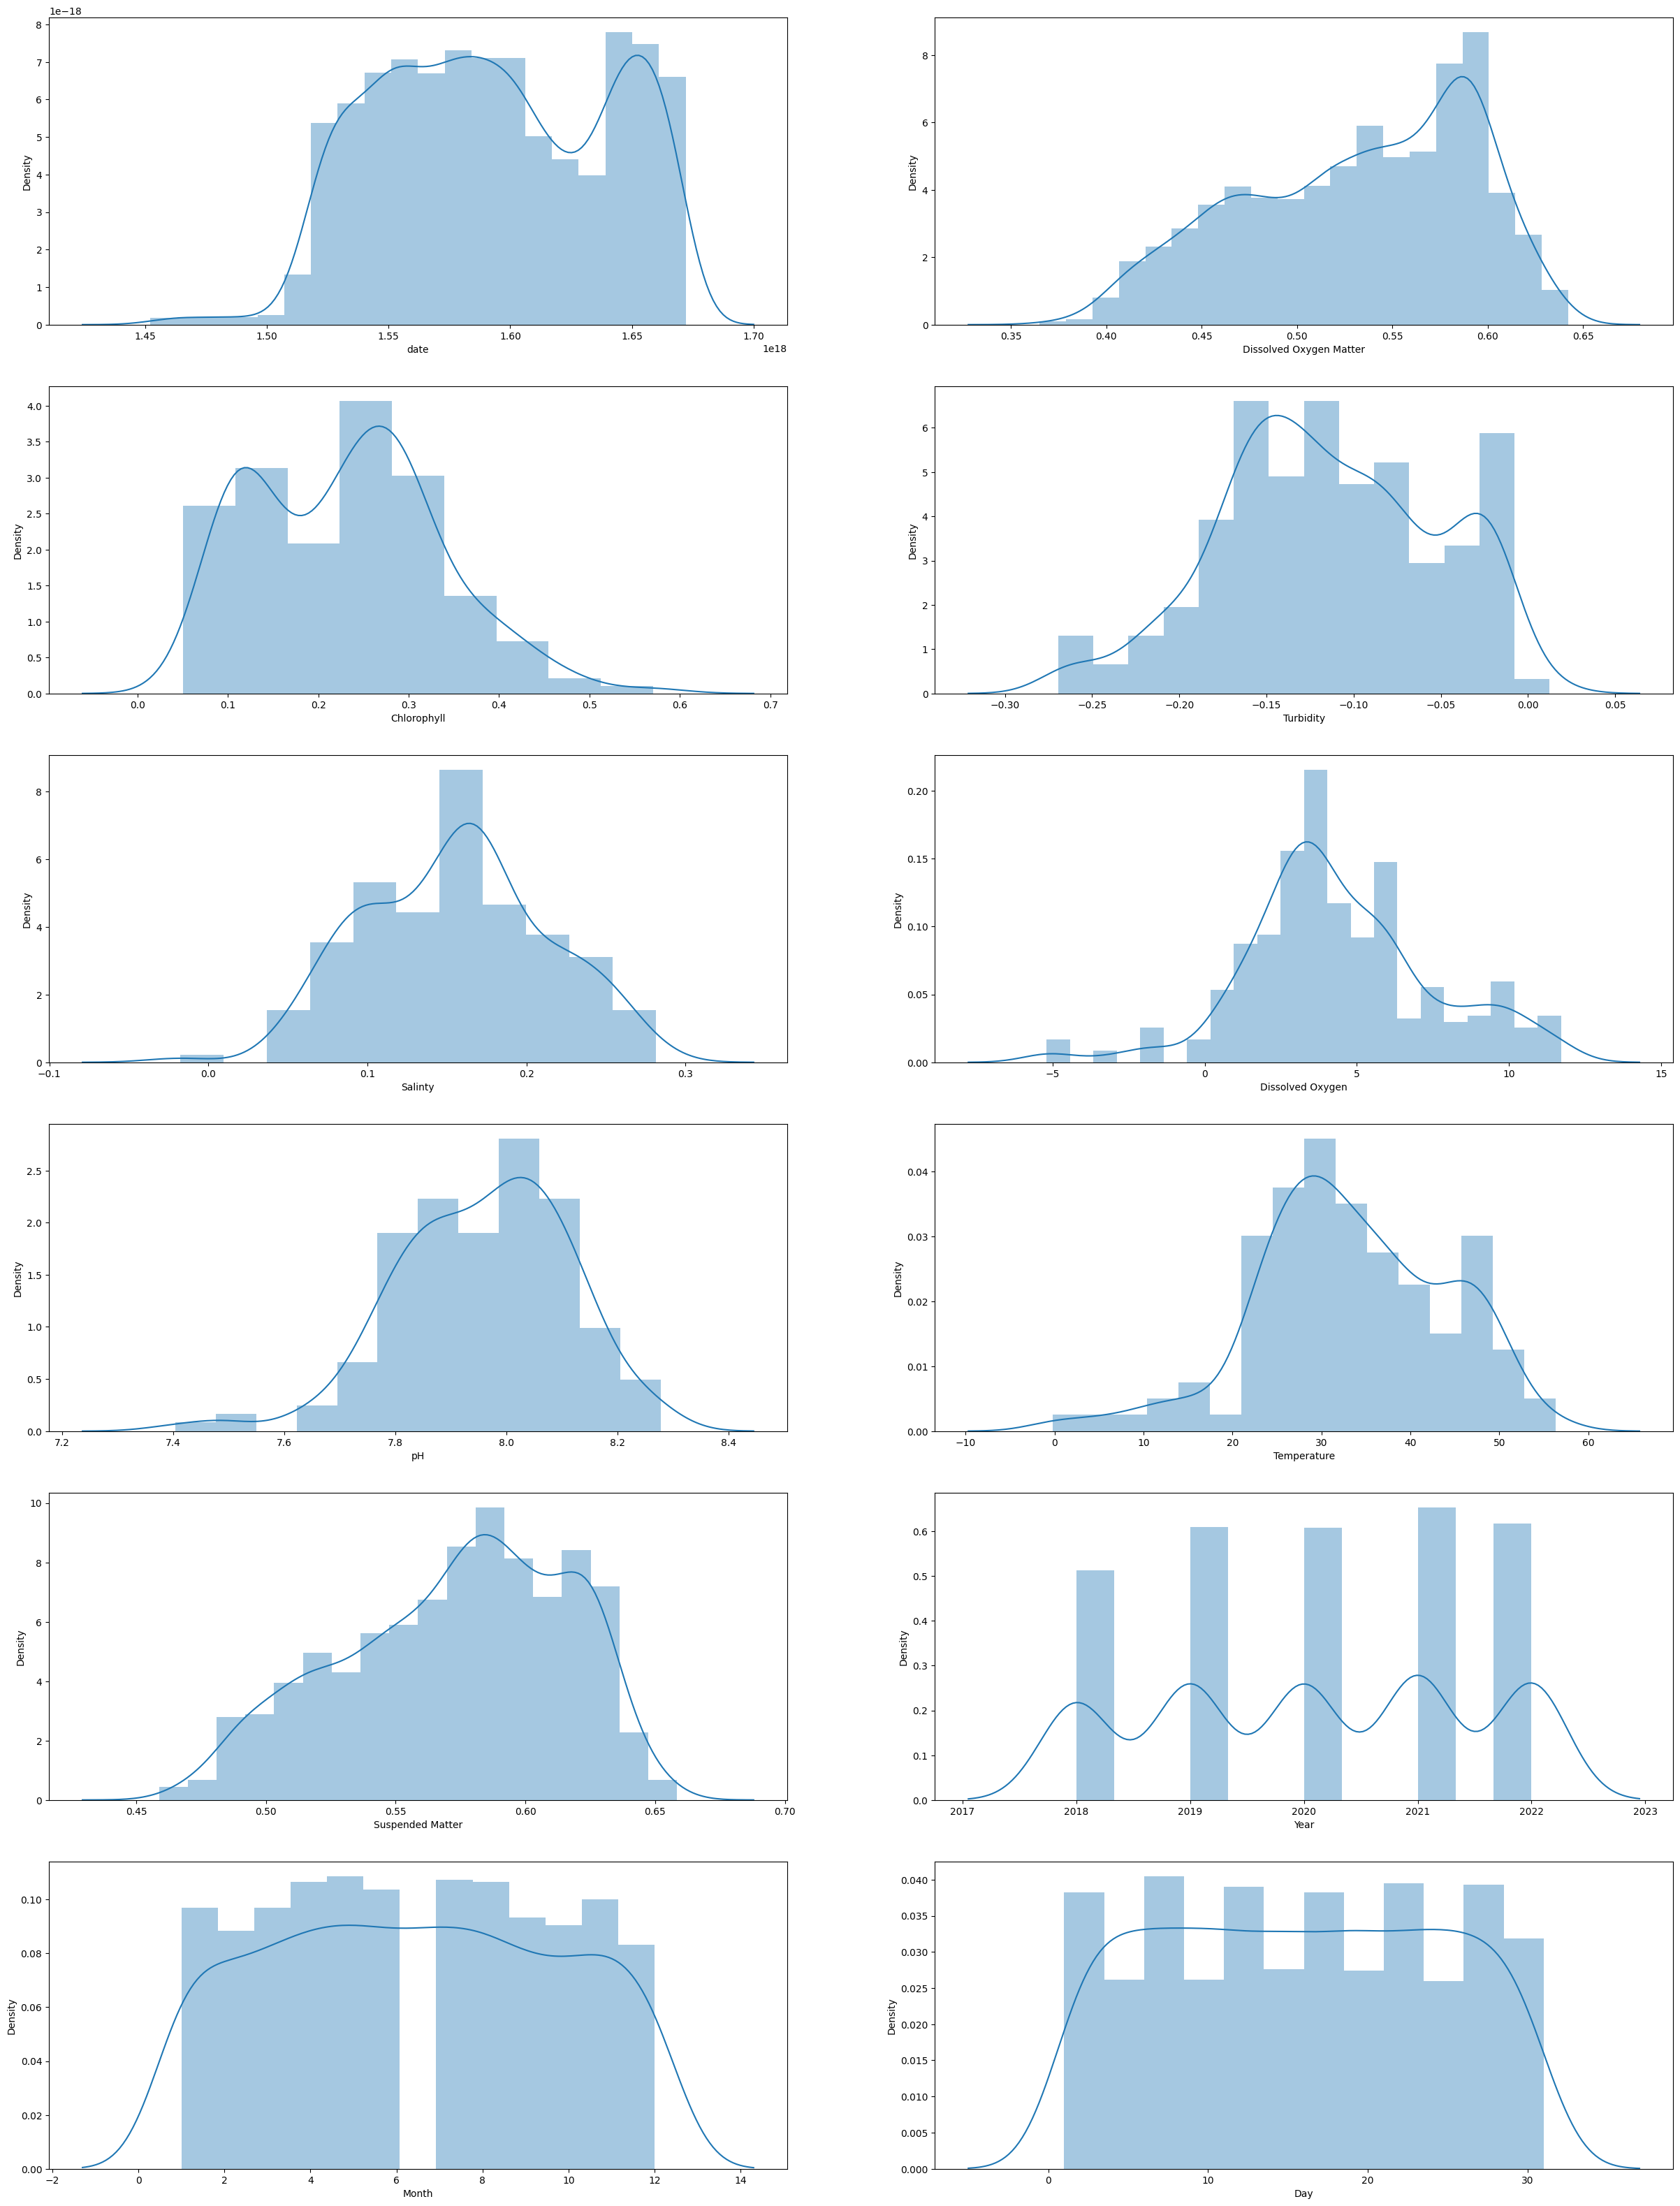

In [32]:
fig,ax = plt.subplots(6,2,figsize=(30,40))
i=0
for col in data_without_outliers.select_dtypes(exclude=['object']):
    #plt.figure() remove the line to avoid the text under the plot !
    #plt.rcParams["figure.figsize"] = (30,40)
    sns.distplot(data_without_outliers[col],ax=ax[i//2,i%2])
    i=i+1

## Showing the relationship among water quality parameters

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\1440985649.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_without_outliers.corr()


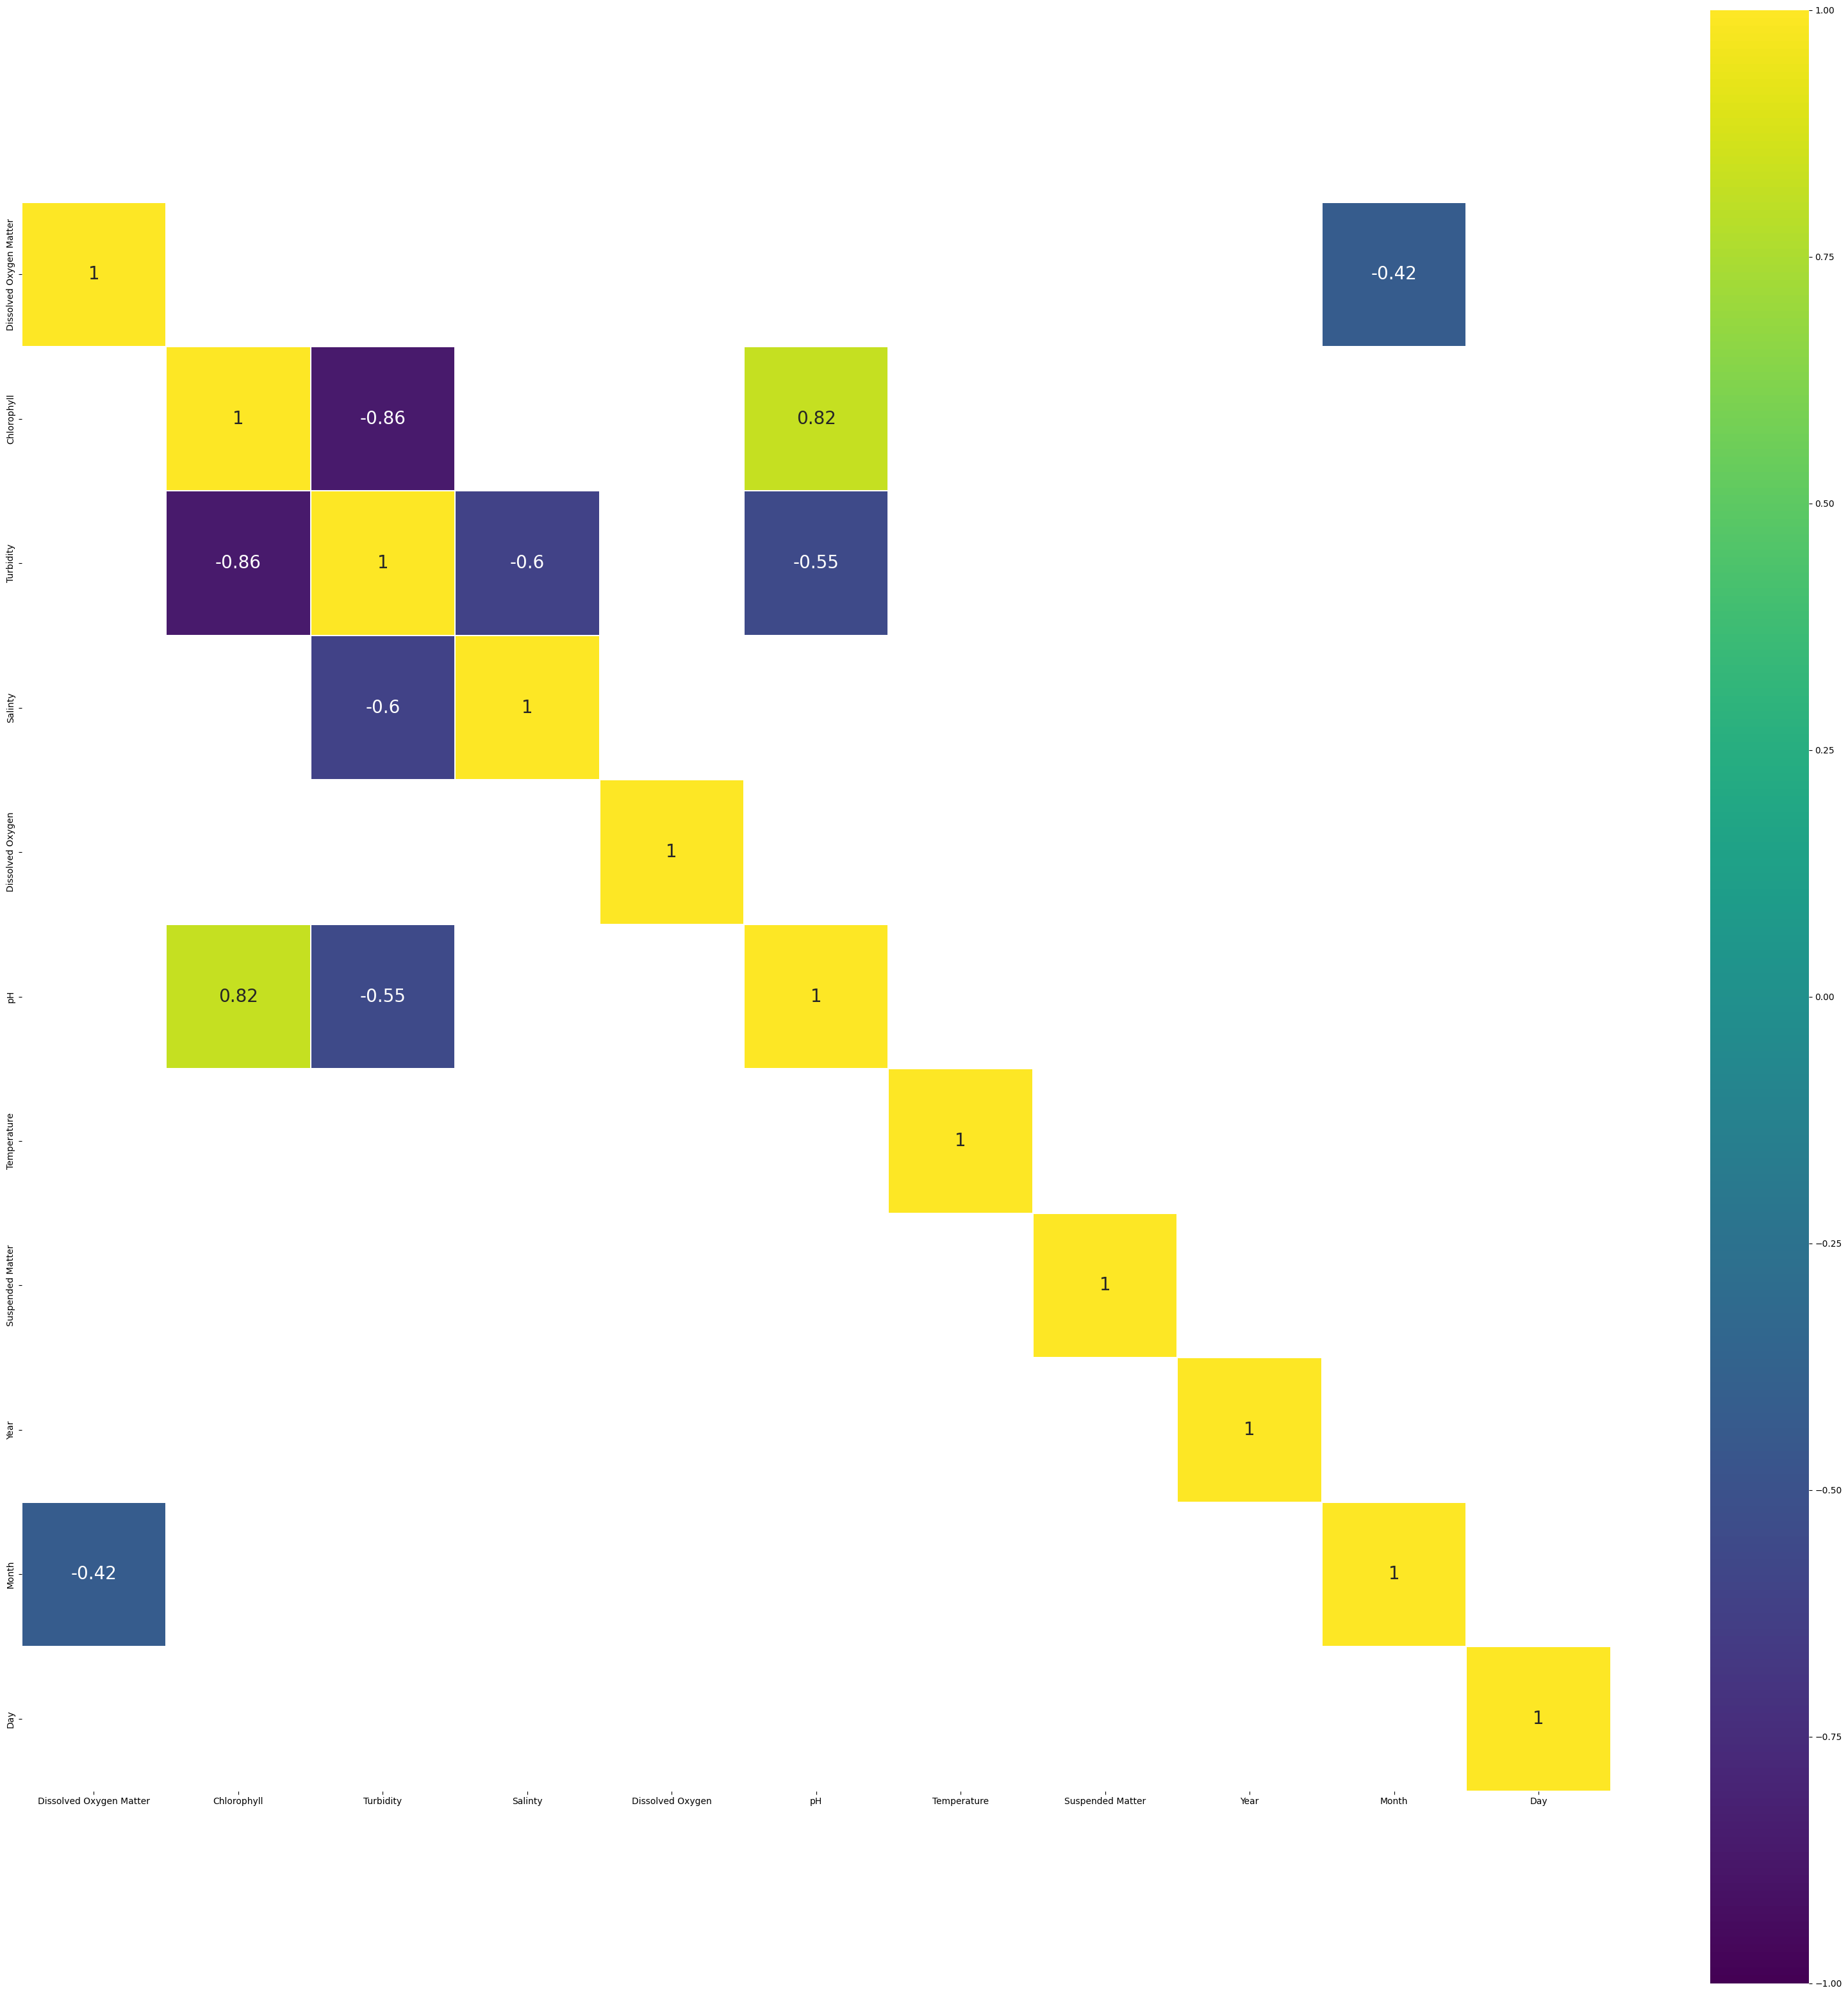

In [41]:
plt.figure(figsize=(40,40))

corr = data_without_outliers.corr()

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 20}, square=True);

plt.show()



In [ ]:
# From the above heatmap relationship we do notice that the amount of chlorophyl is direct proportional to PH . Increased 
# chlorophyl signifies increased decomposing organic matter which raises the PH levels of the lake 
# The negative correlation between chlorophyl and turbidity shows that the two are inversely proportional . 
# There is also inverse proportional relationship between turbidity and PH, salinity and turbidity